In [1]:
import csv
import os
from collections import defaultdict
from datetime import datetime
from datetime import timedelta

import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
total_colums = [
    # Ejemplar
    'TITULO', 'AUTOR', 'EDITORIAL', 'SUCURSAL', 'DESC_SUCURSAL', 'COD_BARRAS_LIBRO', 'NUM_TITULO', 'SIG_TOPOGRAFICA',
    'DEWEY', 'II_SUMARIO', 'I_SUMARIO', 'EDICION', 'LOCALIZACION_EJEMPLAR', 'DESC_LOCALIZACION_EJEMPLAR', 'POLITICA',
    'DESC_POLITICA_EJEMPLAR', 'ISBN', 'FECHA_REGISTRO_EJEMPLAR', 'FECHA_ADICION_EJEMPLAR', 'FECHA_PUB',
    'ESTADO_EJEMPLAR', 'PAIS_EJEMPLAR',
    # Usuario (I)
    'OCUPACION', 'NIVEL_EDUCACION', 'AREA_ESTUDIO',
    # Prestamo (I)
    'SUCURSAL_PRESTAMO', 'SUCURSAL_DEVOLUCION',
    # Usuario (II)
    'SUCURSAL_DEL_LECTOR', 'COD_BARRAS_LECTOR', 'CATEGORÍA',
    # Prestamo (II)
    'FECHA_PRESTAMO', 'FECHA_REAL_DEVOLUCION',
]

In [3]:
used_colums = [
    # Ejemplar
    'TITULO', 'AUTOR', 'SUCURSAL', 'COD_BARRAS_LIBRO', 'DEWEY', 'DESC_LOCALIZACION_EJEMPLAR',
    'FECHA_PUB','PAIS_EJEMPLAR',
    # Usuario (I)
    'OCUPACION','NIVEL_EDUCACION','AREA_ESTUDIO',
    # Prestamo (I)
    'SUCURSAL_PRESTAMO','SUCURSAL_DEVOLUCION',
    # Usuario (II)
    'SUCURSAL_DEL_LECTOR', 'COD_BARRAS_LECTOR', 'CATEGORÍA',
    # Prestamo (II)
    'FECHA_PRESTAMO','FECHA_REAL_DEVOLUCION'
]

# Datos limpios

In [4]:
%%time

dtypes = {
    'TITULO': str,
    'AUTOR': str,
    'SUCURSAL': str,
    'COD_BARRAS_LIBRO': str,
    'DEWEY': str,
    'DESC_LOCALIZACION_EJEMPLAR': str,
    'FECHA_PUB': str,
    'PAIS_EJEMPLAR': str,
    'OCUPACION': str,
    'NIVEL_EDUCACION': str,
    'AREA_ESTUDIO': str,
    'SUCURSAL_PRESTAMO': str,
    'SUCURSAL_DEVOLUCION': str,
    'SUCURSAL_DEL_LECTOR': str,
    'COD_BARRAS_LECTOR': str,
    'CATEGORÍA': str,
    'FECHA_PRESTAMO': str,
    'FECHA_REAL_DEVOLUCION': str,
    'DATE_PRESTAMO': pd.tslib.Timestamp,
    'DATE_DEVOLUCION': pd.tslib.Timestamp,
}

prestamos_df = pd.read_csv('prestamos_totales.csv', header=0, dtype=dtypes, parse_dates=['DATE_PRESTAMO', 'DATE_DEVOLUCION'])
prestamos_df = prestamos_df.fillna('')

CPU times: user 22.9 s, sys: 1.19 s, total: 24.1 s
Wall time: 25.5 s


In [5]:
prestamos_df.shape

(3054360, 20)

In [6]:
prestamos_df.head()

,TITULO,AUTOR,SUCURSAL,COD_BARRAS_LIBRO,DEWEY,DESC_LOCALIZACION_EJEMPLAR,FECHA_PUB,PAIS_EJEMPLAR,OCUPACION,NIVEL_EDUCACION,AREA_ESTUDIO,SUCURSAL_PRESTAMO,SUCURSAL_DEVOLUCION,SUCURSAL_DEL_LECTOR,COD_BARRAS_LECTOR,CATEGORÍA,FECHA_PRESTAMO,FECHA_REAL_DEVOLUCION,DATE_PRESTAMO,DATE_DEVOLUCION
0,Un bicho extraño,"Daporta, Mon.",ARM,2298061,863,Infantil,2010,sp,,,,ARM,ARM,ARM,88429527,CTA,22/01/2015,04/02/2015,2015-01-22,2015-02-04
1,Un bicho extraño,"Daporta, Mon.",ARM,2298061,863,Infantil,2010,sp,,,,ARM,ARM,ARM,88416381,CTA,31/03/2015,07/04/2015,2015-03-31,2015-04-07
2,Quisiera tener ...,"Zoboli, Giovanna.",ARM,2284458,853,Infantil,2010,mx,,,,ARM,ARM,ARM,88381353,CTA,07/11/2015,17/11/2015,2015-11-07,2015-11-17
3,Johannes Gutenberg,"Borràs Perelló, Lluís.",ARM,2288922,925,Infantil,2010,sp,Empleado,Técnico,Adm. de empresas,ARM,ARM,ARM,88007424,CEM,16/01/2015,16/01/2015,2015-01-16,2015-01-16
4,La fantástica leyenda de: la princesa y el dragón,"Alins, Sonia.",ARM,2288896,863,Infantil,2010,sp,,,,ARM,ARM,ARM,88429529,CTA,21/01/2015,28/01/2015,2015-01-21,2015-01-28


## Engagement

#### Número total de préstamos

In [7]:
total_prestamos = prestamos_df.shape[0]
total_prestamos

3054360

#### Número total de lectores

In [8]:
total_lectores = len(prestamos_df.groupby('COD_BARRAS_LECTOR'))
total_lectores

156392

#### Media de préstamos por lector

In [9]:
media_prestamos_lector = total_prestamos / total_lectores
media_prestamos_lector

19.530154995140418

#### Duración total de todos los préstamos (en días)

In [10]:
# %%time

# total_dias = 0
# for i, p in prestamos_df.iterrows():
#     delta = p['DATE_DEVOLUCION'] - p['DATE_PRESTAMO']
#     total_dias += delta.days

# CPU times: user 9min 1s, sys: 710 ms, total: 9min 2s
# Wall time: 9min 1s

total_dias = 39277158

In [11]:
total_dias

39277158

#### Duración media de cada préstamos (en días)

In [12]:
media_dias = total_dias / prestamos_df.shape[0]
media_dias

12.85937414057282

#### Tiempo total medio de préstamos por lector

In [13]:
total_media_tiempo_con_libro = media_prestamos_lector * media_dias
total_media_tiempo_con_libro

251.14557010588777

#### Tasa de tiempo con libros en préstamos por lector

In [14]:
tasa = total_media_tiempo_con_libro / (366 + 365 + 365 + 365 + 366)
tasa

0.13746336623201302

# Visualizaciones

In [30]:
%matplotlib inline
matplotlib.rcParams['figure.max_open_warning'] = 1000
matplotlib.rcParams['lines.linewidth'] = 1.0

### Número de préstamos por mes

In [46]:
# %%time

# def month_year(x):
#     return pd.tslib.Timestamp(day=1, month=x['DATE_PRESTAMO'].month, year=x['DATE_PRESTAMO'].year)

# prestamos_mensuales_df = pd.DataFrame()
# prestamos_mensuales_df['MES'] = prestamos_df.apply(month_year, axis=1)
# prestamos_mensuales_df['TITULO'] = prestamos_df['TITULO']

# CPU times: user 9min, sys: 1.83 s, total: 9min 1s
# Wall time: 9min 1s

CPU times: user 8min 46s, sys: 1.6 s, total: 8min 48s
Wall time: 8min 47s


In [47]:
# prestamos_mensuales_df.to_csv('prestamos_mensuales.csv', index=False)

In [49]:
%%time

dtypes = {
    'TITULO': str,
    'MES': pd.tslib.Timestamp,
}

prestamos_mensuales_df = pd.read_csv('prestamos_mensuales.csv', header=0, dtype=dtypes, parse_dates=['MES'])
prestamos_mensuales_df = prestamos_mensuales_df.fillna('')

CPU times: user 4.51 s, sys: 92 ms, total: 4.6 s
Wall time: 4.6 s


In [50]:
prestamos_mensuales_df.head()

,MES,TITULO
0,2015-01-01,Un bicho extraño
1,2015-03-01,Un bicho extraño
2,2015-11-01,Quisiera tener ...
3,2015-01-01,Johannes Gutenberg
4,2015-01-01,La fantástica leyenda de: la princesa y el dragón


In [51]:
prestamos_mes = prestamos_mensuales_df.groupby('MES').count()

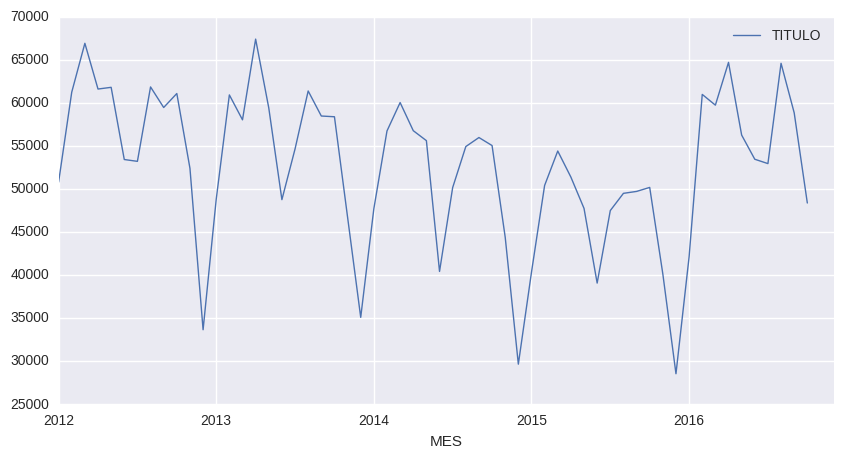

In [207]:
prestamos_mes.plot(figsize=(10,5), xlim=('2012-01-01', '2016-12-31'))

### Títulos populares por topic

In [101]:
prestamos_topic_ok_df = prestamos_df[('000' <= prestamos_df['DEWEY']) & (prestamos_df['DEWEY'] <= '999')]

In [184]:
prestamos_por_topic_y_titulo = prestamos_topic_ok_df.groupby(['DEWEY', 'TITULO'])['AUTOR'].count()

In [185]:
top_10 = prestamos_por_topic_y_titulo.groupby(level=0).nlargest(10)

In [201]:
top_10['303']

DEWEY  TITULO                                                      
303    La violencia en Colombia                                        368
       La era de la información : economía, sociedad y cultura         313
       De la mano de Alicia : lo social y lo político en la postmod    215
       Las 48 leyes del poder                                          190
       Movimientos sociales, Estado y democracia en Colombia           189
       Política cultural [y] cultura política : una nueva mirada so    186
       Violencia política en Colombia : de la nación fragmentada a     178
       Paramilitares y autodefensas : 1982-2003                        177
       Modernidad líquida                                              164
       Más allá de la noche : una historia de amor y de guerra         163
Name: AUTOR, dtype: int64

In [202]:
top_10['320']

DEWEY  TITULO                                                      
320    El príncipe                                                     557
       El pensamiento colombiano en el siglo XIX                       375
       Microfísica del poder                                           294
       Historia de las ideas políticas                                 219
       El contrato social : o, principios del derecho político J. J    204
       Seguridad, territorio, población : curso en el collège de Fr    204
       El nacionalismo cosmopolita : la referencia europea en la co    202
       La modernización en Colombia : los años de Laureano Gómez 18    195
       El contrato social                                              190
       Cuadernos de la cárcel                                          180
Name: AUTOR, dtype: int64

In [203]:
top_10['616']

DEWEY  TITULO                                                      
616    Principios de medicina interna                                  640
       Patología estructural y funcional                               529
       Harrison principios de medicina interna                         441
       Semiología médica : fisiopatología, semiotecnia y propedéuti    298
       Neuroanatomía clínica                                           278
       Microbiología médica                                            261
       Microbiología médica : Jawetz, Melnick y Adelberg               185
       Microbiología médica de Jawetz, Melnick y Adelberg              181
       Inmunología                                                     178
       Los anormales : curso en el College de France (1974-1975)       171
Name: AUTOR, dtype: int64

In [204]:
top_10['986']

DEWEY  TITULO                                                      
986    Historia doble de la Costa                                      663
       Manual de historia de Colombia                                  437
       Historia de Bogotá                                              388
       Historia de Colombia                                            381
       Colombia : país fragmentado, sociedad dividida, su historia     352
       Colombia una nación a pesar de sí misma : de los tiempos pre    344
       Entre la legitimidad y la violencia : Colombia 1875-1994        216
       Historia de Colombia : todo lo que hay que saber                213
       El carnero                                                      200
       La hybris del punto cero : ciencia, raza e ilustración en la    186
Name: AUTOR, dtype: int64

### Títulos populares por topic